In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df=pd.read_csv(r"C:\Users\agata\Downloads\1.csv")

In [52]:
df.head()

,Name,EX,EW,Subtotal (EX+EW),CR(PE),CR(PEW),Subtotal (EX+EW+ CR(PE)+CR(PEW)),CR,EN,VU,Subtotal (threatened spp.),LR/cd,NT or LR/nt,LC or LR/lc,DD,Total
0,GASTROPODA,265,16,281,137,2,420,640,535,"1,003","2,178",0,671,"2,681","1,647","7,458"
1,ACTINOPTERYGII,81,11,92,128,8,228,697,"1,089","1,348","3,134",0,714,"15,269","4,786","23,995"
2,AMPHIBIA,36,2,38,156,1,195,722,"1,144",740,"2,606",0,406,"3,291","1,145","7,486"
3,AVES,159,5,164,22,0,186,233,413,754,"1,400",0,991,"8,587",46,"11,188"
4,INSECTA,59,1,60,93,0,153,425,971,949,"2,345",3,720,"6,096","3,217","12,441"


In [53]:
df=df[["Name","EX", "CR"]]

In [54]:
df=df.sort_values("EX", ascending=False)

In [56]:
df=df.head(10)

In [57]:
df

,Name,EX,CR
36,Total,776,3877
0,GASTROPODA,265,640
3,AVES,159,233
5,MAMMALIA,85,233
1,ACTINOPTERYGII,81,697
4,INSECTA,59,425
2,AMPHIBIA,36,722
6,REPTILIA,32,433
7,BIVALVIA,32,84
8,ARACHNIDA,9,73


In [63]:
df=df.rename(columns={"EX": "Extincted", "CR": "Critically Endangered", "LR/cd":"Lower Risk"})

In [70]:
df = df[df['Name'] != 'Total']

In [71]:
df

,Name,Extincted,Critically Endangered
0,GASTROPODA,265,640
3,AVES,159,233
5,MAMMALIA,85,233
1,ACTINOPTERYGII,81,697
4,INSECTA,59,425
2,AMPHIBIA,36,722
6,REPTILIA,32,433
7,BIVALVIA,32,84
8,ARACHNIDA,9,73


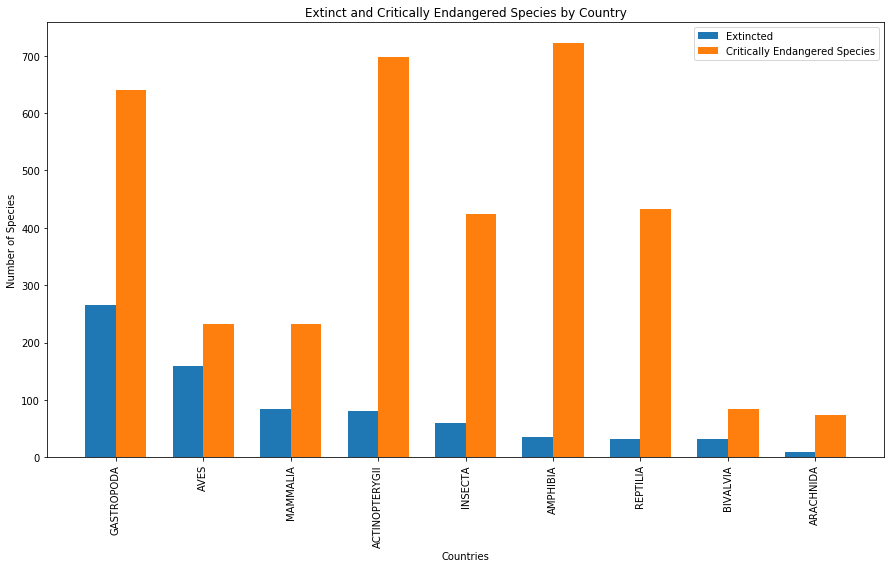

In [83]:
# Set the width of each bar
bar_width = 0.35

# Create an array representing the x-axis positions for the bars
x = range(len(df))
plt.figure(figsize=(15, 8))
# Create the bar plot for Extinct Species
plt.bar(x, df['Extincted'], width=bar_width, label='Extincted')

# Create the bar plot for Critically Endangered Species
plt.bar([i + bar_width for i in x], df['Critically Endangered'], width=bar_width, label='Critically Endangered Species')

# Add labels and title
plt.xlabel('Countries')
plt.ylabel('Number of Species')
plt.title('Extinct and Critically Endangered Species by Country')

# Set x-axis labels
plt.xticks([i + bar_width / 2 for i in x], df['Name'], rotation=90)

# Add a legend
plt.legend()

# Show the plot
plt.show()







In [89]:
import requests
from bs4 import BeautifulSoup
from IPython.display import display, Image

def search_and_display_animal_images(animal_names):
    for animal in animal_names:
        try:
            # Construct a search query based on the animal name
            search_query = f"Image of {animal}"

            # Construct the Google search URL
            search_url = f"https://unsplash.com/images/animals//search?q={search_query}&tbm=isch"

            # Send an HTTP GET request to the search URL
            response = requests.get(search_url)

            if response.status_code == 200:
                # Parse the HTML content of the search results page using BeautifulSoup
                soup = BeautifulSoup(response.content, 'html.parser')

                # Find the first image result
                img_tag = soup.find('img')

                if img_tag:
                    img_url = img_tag.get('src')
                    if img_url:
                        # Display the image in the Jupyter Notebook (or use an appropriate method for your environment)
                        display(Image(url=img_url))
                    else:
                        print(f"No image found for {animal}.")
                else:
                    print(f"No image found for {animal}.")

            else:
                print(f"Failed to retrieve search results for {animal}.")

        except Exception as e:
            print(f"Error while searching for {animal}: {str(e)}")



In [90]:
animal_list = ['Lion', 'Elephant', 'Giraffe']
search_and_display_animal_images(animal_list)

In [96]:
import requests
from bs4 import BeautifulSoup
import os
from PIL import Image
from IPython.display import display



    for animal in animal_names:
        try:
            # Construct the search URL for the animal
            search_url = f"https://unsplash.com/s/photos/{animal}"

            # Send an HTTP GET request to the animal's page
            response = requests.get(search_url)

            if response.status_code == 200:
                # Parse the HTML content of the animal's page using BeautifulSoup
                soup = BeautifulSoup(response.content, 'html.parser')

                # Find the image element on the page
                img_tag = soup.find('img', {'class': 'animal-thumbnail'})

                if img_tag:
                    img_url = img_tag.get('src')

                    if img_url:
                        # Download the image
                        image_data = requests.get(img_url).content

                        with open(os.path.join(output_folder, f"{animal}.jpg"), "wb") as f:
                            f.write(image_data)

                        print(f"Image for {animal} downloaded and saved.")
                        
                        # Display the downloaded image
                        img = Image.open(os.path.join(output_folder, f"{animal}.jpg"))
                        display(img)
                    else:
                        print(f"No image found for {animal}.")
                else:
                    print(f"No image found for {animal}.")

            else:
                print(f"Failed to retrieve information for {animal}.")

        except Exception as e:
            print(f"Error while searching for {animal}: {str(e)}")

# Example usage:
animal_list = ['Lion', 'Elephant', 'Giraffe']
scrape_download_and_display_animal_images(animal_list)


IndentationError: unexpected indent (<ipython-input-96-72bbe0723aa9>, line 9)

In [97]:
import requests
from bs4 import BeautifulSoup
import os
import urllib

def scrape_download_unsplash_animal_images(animal_names, output_folder="animal_images"):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for animal in animal_names:
        try:
            # Construct the Unsplash search URL for the animal
            search_query = urllib.parse.quote(animal)
            search_url = f"https://unsplash.com/s/photos/{search_query}"

            # Send an HTTP GET request to the Unsplash search URL
            response = requests.get(search_url)

            if response.status_code == 200:
                # Parse the HTML content of the search results page using BeautifulSoup
                soup = BeautifulSoup(response.content, 'html.parser')

                # Find all image elements on the page
                img_tags = soup.find_all('img')

                for img_tag in img_tags:
                    img_url = img_tag.get('src')

                    if img_url:
                        # Download the image
                        image_data = requests.get(img_url).content

                        with open(os.path.join(output_folder, f"{animal}.jpg"), "wb") as f:
                            f.write(image_data)

                        print(f"Image for {animal} downloaded and saved.")
                        break  # Stop after the first image

                else:
                    print(f"No image found for {animal}.")

            else:
                print(f"Failed to retrieve images for {animal}.")

        except Exception as e:
            print(f"Error while searching for {animal}: {str(e)}")

# Example usage:
animal_list = ['Lion', 'Elephant', 'Giraffe']
scrape_download_unsplash_animal_images(animal_list)


Image for Lion downloaded and saved.
Image for Elephant downloaded and saved.
Image for Giraffe downloaded and saved.


In [98]:
import requests
from bs4 import BeautifulSoup
import os
import urllib
from PIL import Image
from IPython.display import Image as IPImage, display

def scrape_download_and_display_unsplash_animal_images(animal_names, output_folder="animal_images"):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for animal in animal_names:
        try:
            # Construct the Unsplash search URL for the animal
            search_query = urllib.parse.quote(animal)
            search_url = f"https://unsplash.com/s/photos/{search_query}"

            # Send an HTTP GET request to the Unsplash search URL
            response = requests.get(search_url)

            if response.status_code == 200:
                # Parse the HTML content of the search results page using BeautifulSoup
                soup = BeautifulSoup(response.content, 'html.parser')

                # Find all image elements on the page
                img_tags = soup.find_all('img')

                for img_tag in img_tags:
                    img_url = img_tag.get('src')

                    if img_url:
                        # Download the image
                        image_data = requests.get(img_url).content

                        with open(os.path.join(output_folder, f"{animal}.jpg"), "wb") as f:
                            f.write(image_data)

                        print(f"Image for {animal} downloaded and saved.")

                        # Display the downloaded image
                        img = Image.open(os.path.join(output_folder, f"{animal}.jpg"))
                        display(IPImage(filename=os.path.join(output_folder, f"{animal}.jpg")))
                        break  # Stop after the first image

                else:
                    print(f"No image found for {animal}.")

            else:
                print(f"Failed to retrieve images for {animal}.")

        except Exception as e:
            print(f"Error while searching for {animal}: {str(e)}")

# Example usage:
animal_list = ['Lion', 'Elephant', 'Giraffe']
scrape_download_and_display_unsplash_animal_images(animal_list)


Image for Lion downloaded and saved.


Image for Elephant downloaded and saved.


Image for Giraffe downloaded and saved.


In [102]:
import requests
from bs4 import BeautifulSoup
import os
import urllib
from PIL import Image
from IPython.display import Image as IPImage, display
import io

def scrape_download_and_display_unsplash_animal_images(animal_names, output_folder="animal_images"):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for animal in animal_names:
        try:
            # Construct the Unsplash search URL for the animal
            search_query = urllib.parse.quote(animal)
            search_url = f"https://https://www.pexels.com//{search_query}"

            # Send an HTTP GET request to the Unsplash search URL
            response = requests.get(search_url)

            if response.status_code == 200:
                # Parse the HTML content of the search results page using BeautifulSoup
                soup = BeautifulSoup(response.content, 'html.parser')

                # Find all image elements on the page
                img_tags = soup.find_all('img')

                for img_tag in img_tags:
                    img_url = img_tag.get('src')

                    if img_url:
                        # Download the image
                        image_data = requests.get(img_url).content

                        if len(image_data) > 0:
                            with open(os.path.join(output_folder, f"{animal}.jpg"), "wb") as f:
                                f.write(image_data)

                            print(f"Image for {animal} downloaded and saved.")

                            # Display the downloaded image
                            img = Image.open(os.path.join(output_folder, f"{animal}.jpg"))
                            display(IPImage(filename=os.path.join(output_folder, f"{animal}.jpg")))
                            break  # Stop after the first image
                        else:
                            print(f"Empty image found for {animal}.")
                            break  # Stop searching for images

                else:
                    print(f"No image found for {animal}.")

            else:
                print(f"Failed to retrieve images for {animal}.")

        except Exception as e:
            print(f"Error while searching for {animal}: {str(e)}")

# Example usage:
animal_list = ['Lion', 'Elephant', 'Giraffe']
scrape_download_and_display_unsplash_animal_images(animal_list)


Error while searching for Lion: HTTPSConnectionPool(host='https', port=443): Max retries exceeded with url: //www.pexels.com//Lion (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x000002056E18EA88>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Error while searching for Elephant: HTTPSConnectionPool(host='https', port=443): Max retries exceeded with url: //www.pexels.com//Elephant (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x000002056E18EF48>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Error while searching for Giraffe: HTTPSConnectionPool(host='https', port=443): Max retries exceeded with url: //www.pexels.com//Giraffe (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x000002056E167488>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


In [104]:
!pip install selenium
!pip install chromedriver-binary-auto

  Using cached https://files.pythonhosted.org/packages/10/56/8288d1813a68c1e0638515dbb777fce6d87d0d240e683216f956145310e6/selenium-4.11.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/48/be/a9ae5f50cad5b6f85bd2574c2c923730098530096e170c1ce7452394d7aa/trio_websocket-0.11.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/4c/dd/2234eab22353ffc7d94e8d13177aaa050113286e93e7b40eae01fbf7c3d9/certifi-2023.7.22-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a3/dd/b61fa61b186d3267ef3903048fbee29132963ae762fb70b08d4a3cd6f7aa/trio-0.22.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d2/b2/b157855192a68541a91ba7b2bbcb91f1b4faa51f8bae38d8005c034be524/urllib3-2.0.7-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/78/58/e860788190eba3bcce367f74d29c4675466ce8dddfba85f7827588416f01/wsproto-1.2.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ad/83/b71e58666

ERROR: conda 4.12.0 requires ruamel_yaml_conda>=0.11.14, which is not installed.
ERROR: requests 2.22.0 has requirement urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you'll have urllib3 2.0.7 which is incompatible.
ERROR: google-auth 2.18.1 has requirement urllib3<2.0, but you'll have urllib3 2.0.7 which is incompatible.


  Created wheel for chromedriver-binary-auto: filename=chromedriver_binary_auto-0.3.1-cp37-none-any.whl size=8406179 sha256=90af584e0ab99722c210ff96da4ec2e7f5d8851a6d794bd860173f1ed4cd641c
  Stored in directory: C:\Users\agata\AppData\Local\pip\Cache\wheels\73\2e\5e\023c67f897c31fe2408c12b5c22cb2381ee70027f22dc3c1b0
Successfully built chromedriver-binary-auto


In [100]:
pip install google_images_download

  Using cached https://files.pythonhosted.org/packages/32/2a/63cb8c07d151de92ff9d897b2eb27ba6a0e78dda8e4c5f70d7b8c16cd6a2/cffi-1.15.1-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/ec/6b/63cc3df74987c36fe26157ee12e09e8f9db4de771e0f3404263117e75b95/typing_extensions-4.7.1-py3-none-any.whl
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=14554 sha256=4c00f48f76bcc2806b95c1c1493b0217cbc551635b99e7f6d05e84399254134a
  Stored in directory: C:\Users\agata\AppData\Local\pip\Cache\wheels\1f\28\ad\f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download
  Found existing installation: cffi 1.12.3
    Uninstalling cffi-1.12.3:
      Successfully uninstalled cffi-1.12.3
Note: you may need to restart the kernel to use updated packages.


ERROR: conda 4.12.0 requires ruamel_yaml_conda>=0.11.14, which is not installed.
ERROR: requests 2.22.0 has requirement urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you'll have urllib3 2.0.7 which is incompatible.
ERROR: google-auth 2.18.1 has requirement urllib3<2.0, but you'll have urllib3 2.0.7 which is incompatible.
ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\agata\\AppData\\Local\\Temp\\pip-uninstall-ysq_w4um\\_cffi_backend.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [105]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import requests
import io
from PIL import Image
import time

PATH = "C:\\Users\\Tim\\Desktop\\Web Scraping Images\\chromedriver.exe"

wd = webdriver.Chrome(PATH)

def get_images_from_google(wd, delay, max_images):
	def scroll_down(wd):
		wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
		time.sleep(delay)

	url = "https://www.google.com/search?q=cats&tbm=isch&ved=2ahUKEwjykJ779tbzAhXhgnIEHSVQBksQ2-cCegQIABAA&oq=cats&gs_lcp=CgNpbWcQAzIHCAAQsQMQQzIHCAAQsQMQQzIECAAQQzIECAAQQzIECAAQQzIECAAQQzIECAAQQzIECAAQQzIECAAQQzIECAAQQzoHCCMQ7wMQJ1C_31NYvOJTYPbjU2gCcAB4AIABa4gBzQSSAQMzLjOYAQCgAQGqAQtnd3Mtd2l6LWltZ8ABAQ&sclient=img&ei=7vZuYfLhOeGFytMPpaCZ2AQ&bih=817&biw=1707&rlz=1C1CHBF_enCA918CA918"
	wd.get(url)

	image_urls = set()
	skips = 0

	while len(image_urls) + skips < max_images:
		scroll_down(wd)

		thumbnails = wd.find_elements(By.CLASS_NAME, "Q4LuWd")

		for img in thumbnails[len(image_urls) + skips:max_images]:
			try:
				img.click()
				time.sleep(delay)
			except:
				continue

			images = wd.find_elements(By.CLASS_NAME, "n3VNCb")
			for image in images:
				if image.get_attribute('src') in image_urls:
					max_images += 1
					skips += 1
					break

				if image.get_attribute('src') and 'http' in image.get_attribute('src'):
					image_urls.add(image.get_attribute('src'))
					print(f"Found {len(image_urls)}")

	return image_urls


def download_image(download_path, url, file_name):
	try:
		image_content = requests.get(url).content
		image_file = io.BytesIO(image_content)
		image = Image.open(image_file)
		file_path = download_path + file_name

		with open(file_path, "wb") as f:
			image.save(f, "JPEG")

		print("Success")
	except Exception as e:
		print('FAILED -', e)

urls = get_images_from_google(wd, 1, 6)

for i, url in enumerate(urls):
	download_image("imgs/", url, str(i) + ".jpg")

wd.quit()

AttributeError: 'str' object has no attribute 'capabilities'

In [101]:
from google_images_download import google_images_download

def search_and_display_google_images(animal_names, limit=1):
    response = google_images_download.googleimagesdownload()

    for animal in animal_names:
        try:
            arguments = {"keywords": animal, "limit": limit, "output_directory": "animal_images", "print_urls": False}
            paths = response.download(arguments)

            if paths:
                image_path = paths[animal][0]
                display(Image(filename=image_path))
                print(f"Image for {animal} displayed.")
            else:
                print(f"No images found for {animal}.")

        except Exception as e:
            print(f"Error while searching for {animal}: {str(e)}")

# Example usage:
animal_list = ['Lion', 'Elephant', 'Giraffe']
search_and_display_google_images(animal_list, limit=1)


ModuleNotFoundError: No module named 'google_images_download'